In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

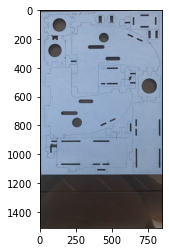

In [2]:
img = cv2.imread('not_cut_properly.jpg', cv2.IMREAD_COLOR)
img1 = img.copy()
gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
# gray_blurred = cv2.GaussianBlur(gray, (11,11), cv2.BORDER_DEFAULT)
gray_blurred = cv2.blur(gray, (3, 3))
plt.imshow(img1)


In [3]:
detected_circles = cv2.HoughCircles(gray_blurred, cv2.HOUGH_GRADIENT, 1, 10, param1 = 100,
                                    param2 = 100, minRadius = 0, maxRadius = 0)

In [4]:
if detected_circles is not None:
  
    detected_circles = np.uint16(np.around(detected_circles))
    print(detected_circles)
    for pt in detected_circles[0, :]:
        x, y, r = pt[0], pt[1], pt[2]
        cv2.circle(img1, (x, y), r, (0, 255, 0), 2)
        cv2.circle(img1, (x, y), 1, (0, 0, 255), 3)

[[[442 192  33]
  [756 526  52]
  [102 280  46]
  [416  64  34]
  [496  64  34]
  [132 102  46]
  [256 780  33]]]


In [5]:
# cv2.namedWindow("detected circles", cv2.WINDOW_NORMAL)
# img = cv2. resize(img, (1000, 800))
cv2.imshow("detected circles", img1)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [6]:
# def get_points_on_circle(x_centre, y_centre, radius):
#     points=[]
#     degrees = np.arange(360)
#     x = np.int32(np.round(np.cos(degrees) * radius)) + x_centre
#     y = np.int32(np.round(np.sin(degrees) * radius)) + y_centre
#     points=list(zip(y,x))
#     return points

In [7]:
def get_points_on_circle(x_centre, y_centre, radius):
    points=[]
    mask = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
    cv2.circle(mask, center=(x_centre, y_centre), radius=radius, color=255, thickness=1)
    y,x=np.where(mask)
    points=list(zip(y,x))
    return points


In [8]:
ret, thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)
cv2.imshow("thresholding", thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
def find_bad_pixels(img, points):
    badpixels=[]
    detectedpixels=[]
    nonzero = cv2.findNonZero(img)
    for point in points:
        distances = np.round(np.sqrt((nonzero[:,:,0] - point[1]) ** 2 + (nonzero[:,:,1] - point[0]) ** 2), 3)
        nearest_index = np.argmin(distances)
        if(min(distances)>=2):
            badpixels.append(point)
            # for closest black pixel detected
            detectedpixels.append(nonzero[nearest_index])
    return badpixels, detectedpixels


In [10]:
# img2=img.copy()
# points=get_points_on_circle(496, 64, 34)
# for point in points:
#     if thresh[point]==255:
#         points.remove(point)
# bad_pixels, nearest_pixels =find_bad_pixels(thresh,points)
# print(bad_pixels, nearest_pixels)
# if bad_pixels:
#     bad2=np.flip(bad_pixels)
#     for px in bad2:
#         x=px[0]
#         y=px[1]
#         cv2.circle(img2, (x, y), 1, (0, 0, 255), 2)
#     ## for printing closest black pixel detected
# if nearest_pixels:
#     nearest2=np.flip(nearest_pixels)
#     for px in nearest2[:,0]:
#         print(px)
#         y=px[0]
#         x=px[1]
#         cv2.circle(img2, (x, y), 1, (0, 255, 0), 2)
    
# cv2.imshow("bad pixels", img2)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


In [11]:
img3=img.copy()
def check_convexity():
    for circle in detected_circles[0, :]:
        x, y, r = circle[0], circle[1], circle[2]
        points = get_points_on_circle(x,y,r)
        for point in points:
            if thresh[point]==255:
                points.remove(point)

        bad_pixels, nearest_pixels =find_bad_pixels(thresh,points)
        print(bad_pixels)
        # print (nearest_pixels)
        if bad_pixels:
            bad2=np.flip(bad_pixels)
            for px in bad2:
                x=px[0]
                y=px[1]
                cv2.circle(img3, (x, y), 1, (0, 0, 255), 2)
            ## for printing closest black pixel detected
        # if nearest_pixels:
        #     nearest2=np.flip(nearest_pixels)
        #     for px in nearest2[:,0]:
        #         print(px)
        #         y=px[0]
        #         x=px[1]
        #         cv2.circle(img3, (x, y), 1, (0, 255, 0), 2)
        
check_convexity()
cv2.imshow("bad pixels", img3)
cv2.waitKey(0)
cv2.destroyAllWindows()   


[]
[]
[]
[(53, 384), (54, 384)]
[(53, 464), (64, 530)]
[]
[]


In [12]:
# [(53, 384), (54, 384)]
# [(53, 464), (64, 530)]